In [2]:
import pandas as pd 
import numpy as np 
import warnings
import joblib

warnings.filterwarnings("ignore")

In [3]:
#leer documento 
diabetes = pd.read_csv("../data/raw/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#total de datos 
diabetes.shape

(768, 9)

In [5]:
#revisar el tipo de datos 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#revisar valores nulos
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

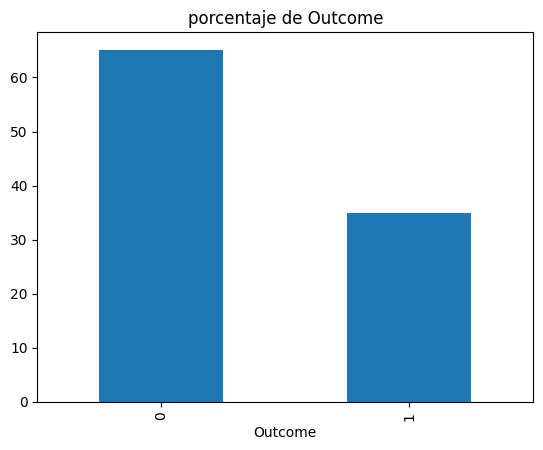

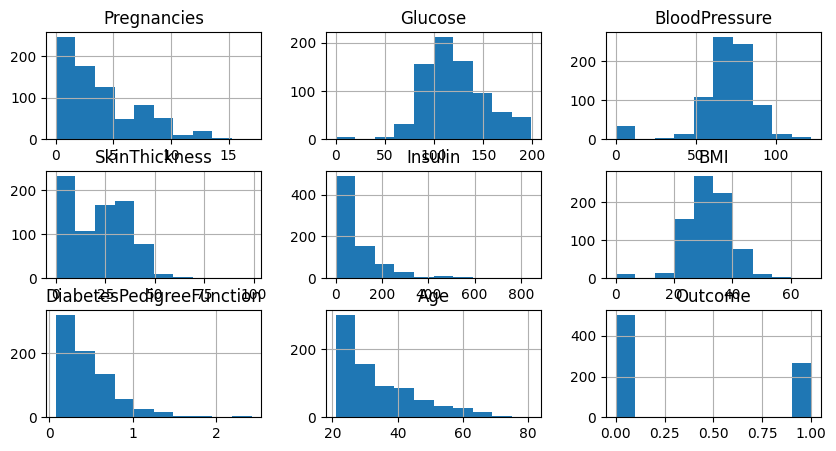

In [7]:
#eda
import seaborn as sns 
import matplotlib.pyplot as plt 

#revisar totales de personas con ambos casos 1 y 0 

# % 
((diabetes.Outcome.value_counts() / diabetes.shape[0])*100).plot(kind='bar')
plt.title("porcentaje de Outcome")
plt.show()

#revisar histograma de las variables 
diabetes.hist(figsize=(10,5))
plt.show()

<Axes: >

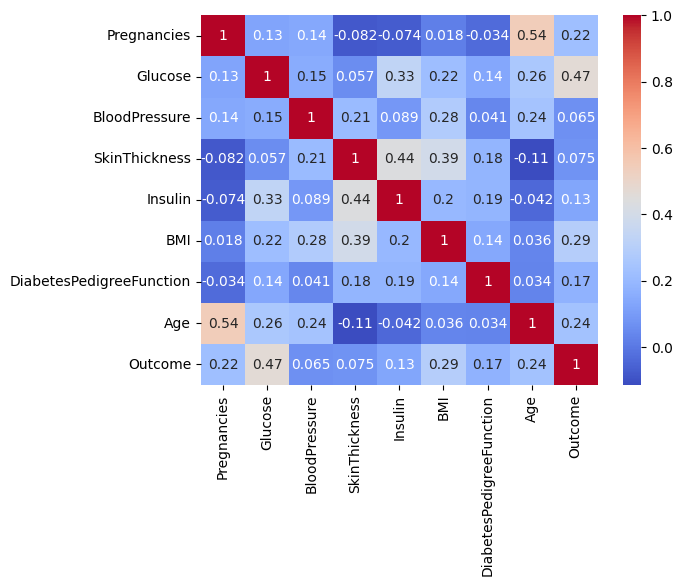

In [8]:
#correlacion de variables 
sns.heatmap(data=diabetes.corr(),cmap='coolwarm',annot=True)

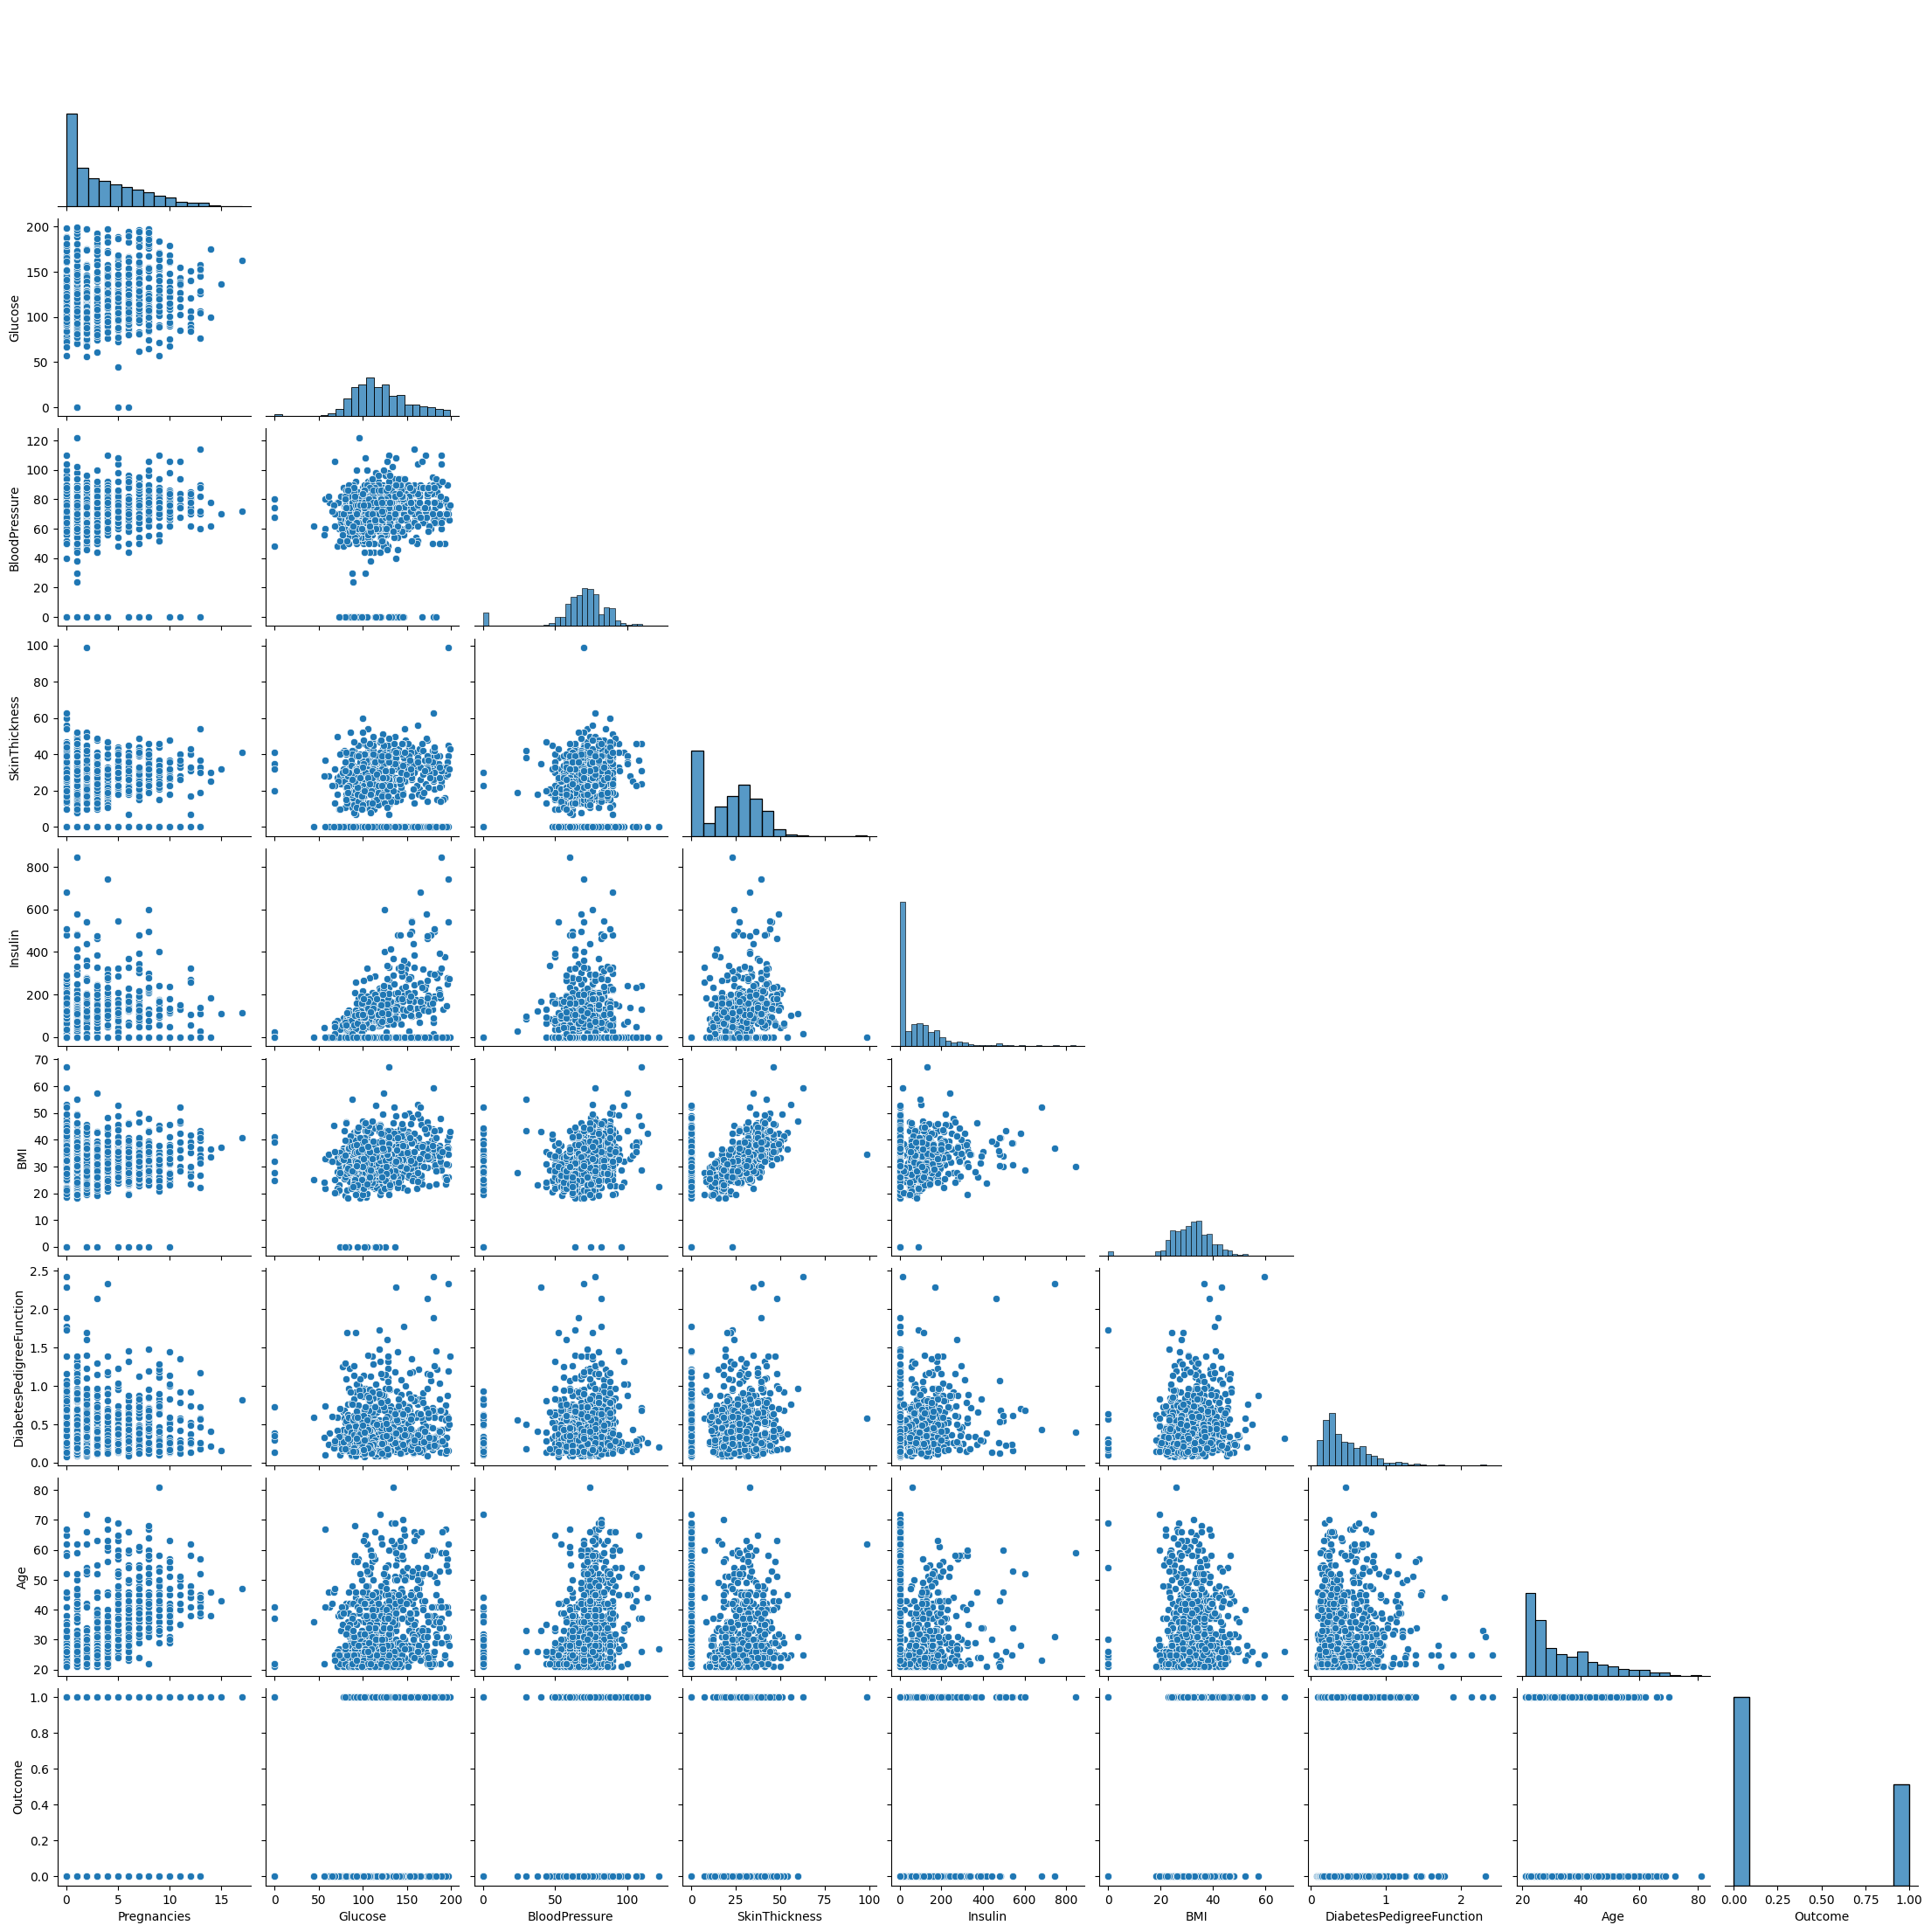

In [9]:
#revisar las correalciones con un diagrama de puntos 
sns.pairplot(data=diabetes,corner=True)
plt.show()

<b>comentarios</b> : Lo que se puede apreciar es que varios de valores de columnas importantes como insulina o glucosa presentan valores en 0, lo cual esto no puede estar bien. Para esto se eliminara valores en 0. 

In [10]:
#limpieza de valores 
clean_data = diabetes[diabetes.columns[:-1]].apply(lambda x: x != 0).all(axis=1)
diabetes = diabetes[clean_data]

In [11]:
big_df = pd.DataFrame(np.repeat(diabetes.values,10,axis=0),columns=diabetes.columns)
big_df = big_df.sample(frac=1)

[[1.000e+00 8.800e+01 7.800e+01 ... 3.200e+01 3.650e-01 2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 ... 3.050e+01 1.580e-01 5.300e+01]
 [3.000e+00 1.760e+02 8.600e+01 ... 3.330e+01 1.154e+00 5.200e+01]
 ...
 [7.000e+00 1.360e+02 7.400e+01 ... 2.600e+01 6.470e-01 5.100e+01]
 [6.000e+00 9.800e+01 5.800e+01 ... 3.400e+01 4.300e-01 4.300e+01]
 [1.000e+00 7.900e+01 8.000e+01 ... 2.540e+01 5.830e-01 2.200e+01]]
n score : 0.7946428571428571
n score : 0.7425595238095238
mejor modelo DecisionTreeClassifier(criterion='entropy', max_depth=3)
accuracy : 0.7946428571428571


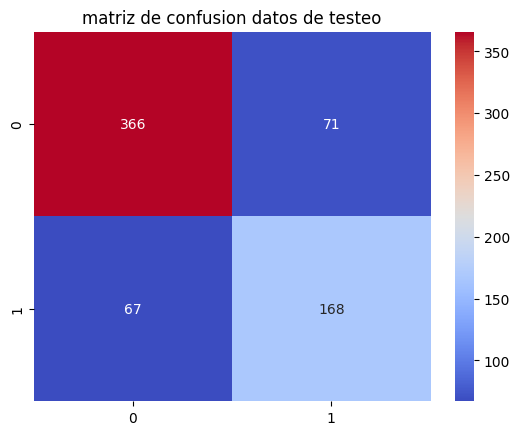

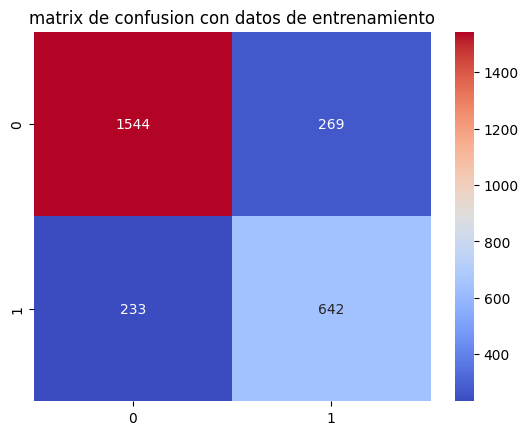

In [26]:
#proceso de entrenamiento modelo 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split


#modelos
models = {
    'tree' : DecisionTreeClassifier,
    'lg' : LogisticRegression
}

#hiperparametros modelos
parametros = {
    'tree' : {
        'criterion' : 'entropy',
        'max_depth' : 3
    },
    'lg' : {}
    
}

#features y target 
X = np.array(big_df.drop(['Outcome'],axis=1))
print(X)
y = big_df['Outcome']

#separar en data de entrenamiento y testeo 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#entrenamiento y resultado del modelo 
best_model = None
best_score = 0

for n,m in models.items():
    model = m(**parametros[n]).fit(X_train,y_train)
    predict = model.predict(X_test)
    score = accuracy_score(y_test,predict)
    print(f"n score : {score}")
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"mejor modelo {best_model}")
print(f"accuracy : {best_score}")


#graficar grafico de confusion 

## datos de test
y_hat = best_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_hat)
sns.heatmap(cnf_matrix,annot=True,cmap='coolwarm',fmt='g')
plt.title('matriz de confusion datos de testeo')
plt.show()
#datos de entranmiento
y_hat = best_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_hat)
sns.heatmap(cnf_matrix,annot=True,cmap='coolwarm',fmt='g')
plt.title('matrix de confusion con datos de entrenamiento')
plt.show()


In [18]:
#guardar modelo 
joblib.dump(best_model,'../../models/diabetes_model.pkl')

['../../models/diabetes_model.pkl']

In [32]:

data = {
    'embarazos' : 40.0,
    'glucosa' : 170,
    'presion_sangre' : 60,
    'gro_piel' : 32,
    'insulina' : 120,
    'imc' : 33.45,
    'historial_f' : 0.6,
    'edad' : 52
 }

df_to_predict = pd.DataFrame(data,index=[0])
X = np.array(df_to_predict)
result = best_model.predict(X)[0]

if result == 1: print("diabetico")
else: print("no-diabetico")


diabetico
